In [1]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import cv2
import matplotlib
import os
import pywt
import shutil
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

%matplotlib inline

C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [3]:
img = cv2.imread('./test_images/will_smith_test.jpg')
img.shape

(670, 1005, 3)

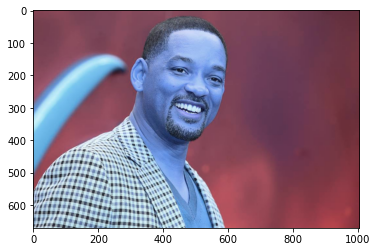

In [4]:
plt.imshow(img)

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(670, 1005)

In [6]:
gray

array([[ 77,  77,  77, ...,  54,  54,  54],
       [ 77,  77,  77, ...,  54,  54,  54],
       [ 77,  77,  77, ...,  54,  54,  54],
       ...,
       [ 61, 107,  49, ...,  60,  59,  59],
       [209, 166, 193, ...,  60,  59,  59],
       [199, 198, 213, ...,  60,  59,  59]], dtype=uint8)

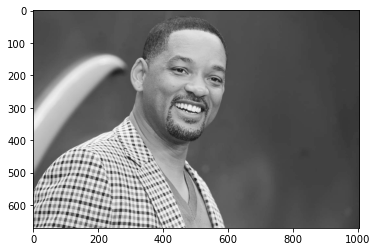

In [7]:
plt.imshow(gray, cmap='gray')

In [8]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[356,  79, 290, 290]])

In [9]:
(x,y,w,h) = faces[0]
x,y,w,h

(356, 79, 290, 290)

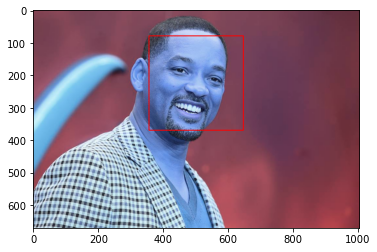

In [10]:
face_img = cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0),2)
plt.imshow(face_img)

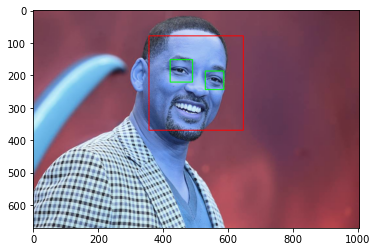

In [11]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey), (ex+ew, ey+eh), (0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

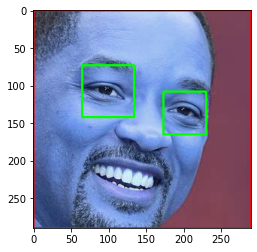

In [12]:
plt.imshow(roi_color, cmap='gray')

In [13]:
# function that return cropped faces
def get_cropped_image_if_2_eyes(image_path):
    try:
        img = cv2.imread(image_path)
        #plt.imshow(img, cmap='gray')
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3,5)
        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if len(eyes) >= 2:
                return roi_color
    except Exception:
        pass

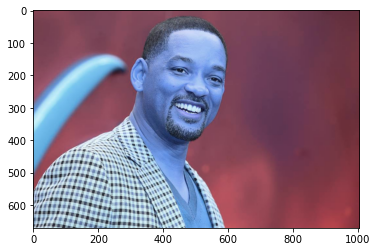

In [14]:
original_image = cv2.imread('./test_images/will_smith_test.jpg')
plt.imshow(original_image)

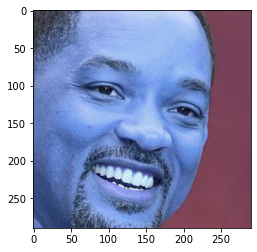

In [15]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/will_smith_test.jpg')
plt.imshow(cropped_image)

In [16]:
path_to_data = "./datasets"
path_to_cr_data = "./datasets/cropped/"

In [17]:
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [18]:
img_dirs

['./datasets\\.ipynb_checkpoints',
 './datasets\\bruce_willis',
 './datasets\\cropped',
 './datasets\\matthew_mcconaughey',
 './datasets\\ovechkin',
 './datasets\\will_smith']

In [19]:
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [20]:
img_dirs

['./datasets\\.ipynb_checkpoints',
 './datasets\\bruce_willis',
 './datasets\\cropped',
 './datasets\\matthew_mcconaughey',
 './datasets\\ovechkin',
 './datasets\\will_smith']

In [21]:
img_dirs = img_dirs[1:]


In [22]:
img_dirs

['./datasets\\bruce_willis',
 './datasets\\cropped',
 './datasets\\matthew_mcconaughey',
 './datasets\\ovechkin',
 './datasets\\will_smith']

In [23]:
img_dirs

['./datasets\\bruce_willis',
 './datasets\\cropped',
 './datasets\\matthew_mcconaughey',
 './datasets\\ovechkin',
 './datasets\\will_smith']

In [24]:
img_dirs_2 = img_dirs.remove('./datasets\\cropped')

In [25]:
img_dirs

['./datasets\\bruce_willis',
 './datasets\\matthew_mcconaughey',
 './datasets\\ovechkin',
 './datasets\\will_smith']

In [26]:
cropped_image_dirs = []
celebrity_file_names_dict = {}


for img_dir in img_dirs:
    #celebrity_name = img_dir.split('/')[-1]
    count = 1
    celebrity_name = img_dir.split('\\')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        #print(entry.path)
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder:", cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

bruce_willis
Generating cropped images in folder: ./datasets/cropped/bruce_willis
matthew_mcconaughey
Generating cropped images in folder: ./datasets/cropped/matthew_mcconaughey
ovechkin
Generating cropped images in folder: ./datasets/cropped/ovechkin
will_smith
Generating cropped images in folder: ./datasets/cropped/will_smith


In [27]:
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datarype conversions
    #convert to grayscale
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    #convert to float
    imArray = np.float32(imArray)
    imArray /= 255;
    #compute coefficients
    coeffs = pywt.wavedec2(imArray, mode, level=level)
    
    #Process coefficients
    coeffs_H = list(coeffs)
    coeffs_H[0] *=0;
    
    #reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H

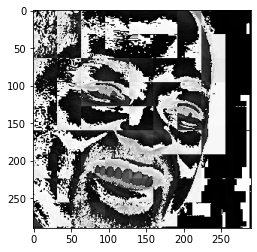

In [28]:
im_har = w2d(cropped_image, 'db1', 5)
plt.imshow(im_har, cmap='gray')

In [29]:
celebrity_file_names_dict

{'bruce_willis': ['./datasets/cropped/bruce_willis/bruce_willis1.png',
  './datasets/cropped/bruce_willis/bruce_willis2.png',
  './datasets/cropped/bruce_willis/bruce_willis3.png',
  './datasets/cropped/bruce_willis/bruce_willis4.png',
  './datasets/cropped/bruce_willis/bruce_willis5.png',
  './datasets/cropped/bruce_willis/bruce_willis6.png',
  './datasets/cropped/bruce_willis/bruce_willis7.png',
  './datasets/cropped/bruce_willis/bruce_willis8.png',
  './datasets/cropped/bruce_willis/bruce_willis9.png',
  './datasets/cropped/bruce_willis/bruce_willis10.png',
  './datasets/cropped/bruce_willis/bruce_willis11.png',
  './datasets/cropped/bruce_willis/bruce_willis12.png',
  './datasets/cropped/bruce_willis/bruce_willis13.png',
  './datasets/cropped/bruce_willis/bruce_willis14.png',
  './datasets/cropped/bruce_willis/bruce_willis15.png',
  './datasets/cropped/bruce_willis/bruce_willis16.png',
  './datasets/cropped/bruce_willis/bruce_willis17.png',
  './datasets/cropped/bruce_willis/bruce_

In [30]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    try:
        class_dict[celebrity_name] = count
        count = count + 1
    except Exception:
        pass
class_dict

{'bruce_willis': 0, 'matthew_mcconaughey': 1, 'ovechkin': 2, 'will_smith': 3}

In [31]:
X = []
y = []


for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        try:
            img = cv2.imread(training_image)
            scalled_raw_img = cv2.resize(img, (32,32))
            img_har = w2d(img, 'db1', 5)
            scalled_img_har = cv2.resize(img_har, (32,32))
            combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
            X.append(combined_img)
            y.append(class_dict[celebrity_name])
        except Exception:
            continue

In [32]:
X = np.array(X).reshape(len(X), 4096).astype(float)
X.shape

(184, 4096)

**Data cleaning process is done. Now we are ready to train our model**

We will use SVM with rbf kernel tuned with heuristic finetuning

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12345)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6956521739130435

In [34]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.50      0.20      0.29         5
           1       0.68      0.93      0.79        28
           2       1.00      0.20      0.33         5
           3       0.80      0.50      0.62         8

    accuracy                           0.70        46
   macro avg       0.75      0.46      0.51        46
weighted avg       0.72      0.70      0.65        46



**Let's use GridSearch to try out different models with different parametrs. Goal is to cone up with best model with best fine tuned parameters**

In [35]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [36]:
scores = []
best_estimators = {}
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf = GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model':algo,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df

,model,best_score,best_params
0,svm,0.854762,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.659788,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.710847,{'logisticregression__C': 1}


In [37]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [38]:
best_estimators['svm'].score(X_test,y_test)

0.782608695652174

In [39]:
best_estimators['random_forest'].score(X_test,y_test)

0.6521739130434783

In [40]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.6956521739130435

In [41]:
best_clf = best_estimators['svm']

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 3,  2,  0,  0],
       [ 1, 26,  0,  1],
       [ 0,  3,  2,  0],
       [ 1,  2,  0,  5]], dtype=int64)

Text(69.0, 0.5, 'Truth')

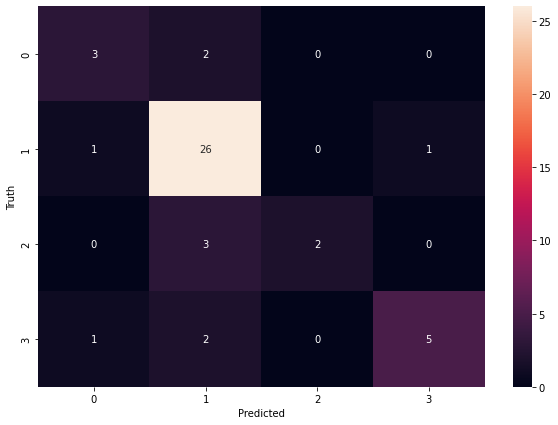

In [43]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [44]:
class_dict

{'bruce_willis': 0, 'matthew_mcconaughey': 1, 'ovechkin': 2, 'will_smith': 3}

**Save the trained model**

In [45]:
#!pip install joblib
import joblib
#save the model as a pickle in a file
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

**Save class dictionary**

In [46]:
import json
with open("class_dictionary.json", "w") as f:
    f.write(json.dumps(class_dict))